In [1]:
#change the dataset into Pandas dataframe
import pandas as pd
dataset = pd.read_csv("data/a_to_z_handwritten_data_updated_smaller.csv")
#anyway check the raw data
dataset.tail()

0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
9995  25    0    0    0    0    0    0    0    0    0  ...      0      0   
9996  25    0    0    0    0    0    0    0    0    0  ...      0      0   
9997  25    0    0    0    0    0    0    0    0    0  ...      0      0   
9998  25    0    0    0    0    0    0    0    0    0  ...      0      0   
9999  25    0    0    0    0    0    0    0    0    0  ...      0      0   

      0.641  0.642  0.643  0.644  0.645  0.646  0.647  0.648  
9995      0      0      0      0      0      0      0      0  
9996      0      0      0      0      0      0      0      0  
9997      0      0      0      0      0      0      0      0  
9998      0      0      0      0      0      0      0      0  
9999      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]

In [2]:
#check the info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, 0 to 0.648
dtypes: int64(785)
memory usage: 59.9 MB


In [3]:
#As you know, there are 26 alphabets from A to Z. 
#The first colummn shows labels comprised of "0 to 25", in short, the correct answers.
#For example, "0" is "A". "25" is "Z".
#Process loading dataset and change it into float 32 data, and name the first colummn "label".
dataset.astype('float32')
dataset.rename(columns={'0':'label'}, inplace=True)
# Now X is "Explanatory variable", y is "Taget".
X = dataset.drop('label',axis = 1)
y = dataset['label']

In [4]:
alphabets="abcdefghijklmnopqrstuvwxyz"
letter_name=[]
[letter_name.append(i) for i in alphabets]
name_tag = pd.DataFrame(letter_name)

/tmp/ipykernel_26901/3536595811.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y,kde=False)


<Axes: >

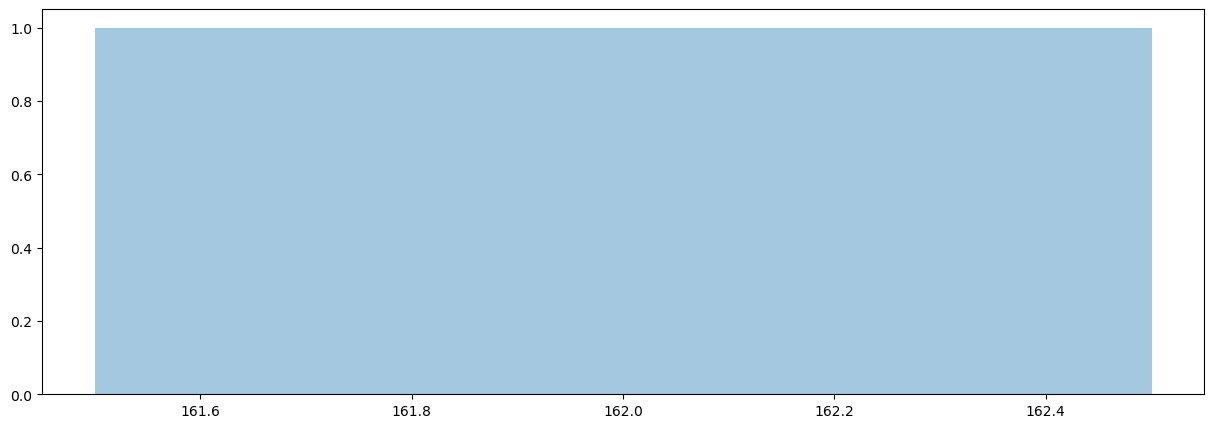

In [29]:
#import two libraries, matplot, seaborn.
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(15,5))
sns.distplot(y,kde=False)

Now I know so many letter "O".

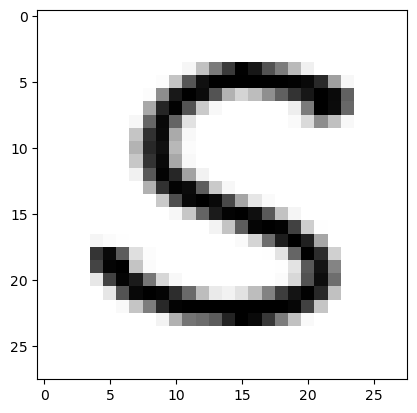

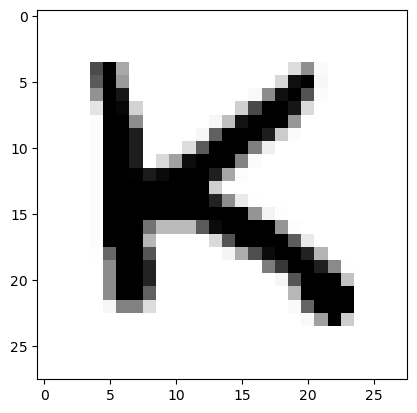

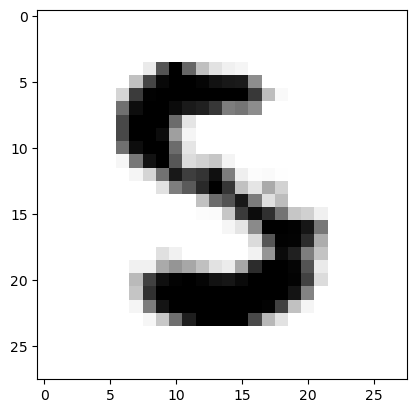

In [6]:
#import numpy and give a seed. 
import numpy as np
np.random.seed(2)
#Show 3 letter at random and convert them into gray scale letters. 
for i in range(3):
    plt.imshow(X.iloc[np.random.randint(0,9999)].values.reshape(28,28),cmap='Greys')
    plt.show()

In [117]:
# load some libraries that I frequently use. 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import numpy as np

In [118]:
#Now, reload the dataset and change it into "numpy array".
dataset = np.loadtxt('data/a_to_z_handwritten_data_updated_smaller.csv', delimiter=',')
#Divide dataset into two parts, one is "Explanatory variable", the other is "Taget".
X = dataset[:,0:784]
Y = dataset[:,0]
#Split the "X,Y" data into the ratio of 8:2, 2 is the test size. 
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.2, random_state=2)
#Reshape the data and change it into float 32 as usual.
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
#The pixcel of the data is comprised from 0 to 255. 0 is white,255 is black.
#Now normalize the data from 0 to 1 without some libraries, in a simple way.
X_train = X_train / 255
X_test = X_test / 255

In [119]:
# One-Hot-Encoding of the target.
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
# Define the classification of 26 alphabets.
num_classes = Y_test.shape[1]

In [120]:
model = load_model("data/jupyter-notebook-tensorflow-model.model")

#Build an ordinary "Deep Learning" model with CNN and maxpooling by using Keras.
#model = Sequential()
#model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dense(num_classes, activation='softmax'))
#Choose an optimizer and compile the model.
#model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
#And print the summary of the model.
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 4608)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               589952    
                                                                 
 dense_13 (Dense)            (None, 26)                3354      
                                                                 
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
________________________________________________

In [121]:
#Fit the train data of model 1.
#Train1=model.fit(X_train, Y_train,batch_size=128, epochs=50)

In [122]:
#Check the test data of the model 1.
#Test1=model.fit(X_test, Y_test,batch_size=128, epochs=50)

In [97]:
#Build the second model to look for best or better models.
#Many people says "Adam" is way better than RMSprop. But I wanna try it just in case.
#model = Sequential()
#model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dense(num_classes, activation='softmax'))
#print(model.summary())
#Now the second model's optimizer is "RMSprop".
#model.compile(optimizer = "rmsprop", loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [98]:
#Check the second model named the model 2.
#Train2=model.fit(X_train, Y_train,batch_size=128, epochs=5)

In [99]:
#Check the test data of the second model too.
#Test2=model.fit(X_test, Y_test,batch_size=128, epochs=5)

In [116]:
#Evaluate the two models by using two metrics, loss and accuracy.
metrics = ['loss', 'accuracy']
#show the evaluation result by using matoplot.
plt.figure(figsize=(10, 5))
#Use "For Loop".
for i in range(len(metrics)):
    metric = metrics[i]
    #set subplots to show the result
    plt.subplot(1, 2, i+1)
    #Titles of subplots are "loss" and "accuracy"
    plt.title(metric) 
    plt_train1 = Train1.history[metric] 
    plt_test1 = Test1.history[metric]
    #plt_train2 = Train2.history[metric]
    #plt_test2 = Test2.history[metric] 
    #plot them all
    plt.plot(plt_train1, label='train1') 
    #plt.plot(plt_train2, label='train2') 
    plt.plot(plt_test1, label='test1') 
    #plt.plot(plt_test2, label='test2') 
    plt.legend() 
plt.show()

Now I know the common understanding "The Adam is way better than RMSprop." is wrong in this case. 

In [102]:
#model.save("data/jupyter-notebook-tensorflow-model.model", save_format="h5")

In [104]:
#I wanna try Dilution technique also know as Dropout. So I build the third model.
#model = Sequential()
#model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
#model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dense(num_classes, activation='softmax'))
#Print the model
#print(model.summary())
#Compile the model
#model.compile(optimizer = "rmsprop", loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [105]:
#Now check the both data of the third model in one time.
#Train3=model.fit(X_train, Y_train,batch_size=128, epochs=5)
#Test3=model.fit(X_test, Y_test,batch_size=128, epochs=5)

In [106]:
#Evaluate the two models by using two metrics, loss and accuracy.
metrics = ['loss', 'accuracy']
#show the evaluation result by using matoplot.
plt.figure(figsize=(10, 5))
#Use "For Loop".
for i in range(len(metrics)):
    metric = metrics[i]
    plt.subplot(1, 2, i+1)
    plt.title(metric) 
    plt_train1 = Train1.history[metric] 
    plt_test1 = Test1.history[metric]
    #plt_train2 = Train2.history[metric]
    #plt_test2 = Test2.history[metric] 
    #plt_train3 = Train3.history[metric]
    #plt_test3 = Test3.history[metric] 
    plt.plot(plt_train1, label='train1') 
    #plt.plot(plt_train2, label='train2') 
    #plt.plot(plt_train3, label='train3') 
    plt.plot(plt_test1, label='test1') 
    #plt.plot(plt_test2, label='test2') 
    #plt.plot(plt_test3, label='test3') 
    plt.legend() 
plt.show()

In [107]:
#Now I came into a conclusion that the second model shows the best performance.
#So I chose the model 2 for this case. 

One of Kaggle buddies asked me a question how to predict. I should have mentioned in my notebook. Let's update this notebook.


In [108]:
#Here is the prediction sample.
plt.imshow(X_test[[18]].reshape(28,28),cmap='Greys')

In [109]:
type(X_test)

# NumPY NDArray, 28 x 28
# Reference the nth multi-dimensional array in the test data set 
# X_test[[18]] n = 18

numpy.ndarray

In [110]:
#Let's predict.
prediction=model.predict(X_test[[18]]) 
prediction

1/1 [==============================] - 0s 38ms/step


array([[1.1303227e-32, 1.6227957e-27, 0.0000000e+00, 6.9645759e-15,
        1.3184250e-24, 1.5162917e-35, 1.1186610e-29, 2.9935005e-35,
        0.0000000e+00, 3.1645562e-26, 0.0000000e+00, 0.0000000e+00,
        9.9999881e-01, 1.1920313e-06, 3.1312142e-23, 6.9177223e-34,
        0.0000000e+00, 9.7632840e-29, 5.9714948e-31, 5.6267469e-28,
        5.9819554e-25, 4.4867146e-37, 1.3835651e-16, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [111]:
#Preparation for this predction. 
alphabets="abcdefghijklmnopqrstuvwxyz"
list1=[]
[list1.append(i) for i in range(26)]
list2=[]
[list2.append(i) for i in alphabets]
dic = dict(zip(list1, list2))
#Let's check the result.
print("The answer is",dic[np.argmax(prediction)],". :-)")


The answer is m . :-)


1/1 [==============================] - 0s 16ms/step
[INFO] H - 100.00%
[INFO] P - 100.00%
[INFO] Y - 99.88%
[INFO] P - 58.05%
[INFO] Y - 100.00%
[INFO] A - 100.00%
[INFO] U - 98.88%
[INFO] L - 99.75%
[INFO] W - 99.87%
[INFO] G - 99.61%
[INFO] H - 100.00%
[INFO] T - 45.77%
[INFO] G - 96.66%
[INFO] E - 86.06%
[INFO] A - 100.00%
[INFO] A - 99.32%
[INFO] G - 100.00%
[INFO] P - 46.91%
[INFO] P - 99.27%
[INFO] P - 99.97%
[INFO] X - 63.64%
[INFO] H - 52.43%
[INFO] A - 99.75%
[INFO] K - 98.79%
[INFO] C - 86.03%
[INFO] S - 67.53%
[INFO] C - 98.69%
[INFO] S - 100.00%


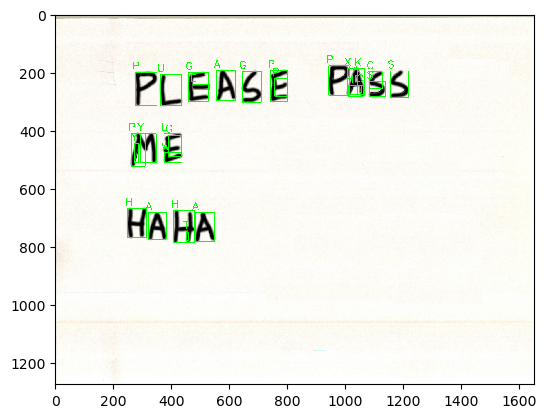

In [115]:
import imutils
import cv2
from imutils.contours import sort_contours

# load the input image from disk, convert it to grayscale, and blur
# it to reduce noise
image = cv2.imread("images/scanned-images/pages-2.jpg") 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
edged = cv2.Canny(blurred, 30, 150)
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]

# initialize the list of contour bounding boxes and associated
# characters that we'll be OCR'ing
chars = []

# loop over the contours
for c in cnts:
	# compute the bounding box of the contour
	(x, y, w, h) = cv2.boundingRect(c)

	# filter out bounding boxes, ensuring they are neither too small
	# nor too large
	if (w >= 5 and w <= 150) and (h >= 15 and h <= 120):
		# extract the character and threshold it to make the character
		# appear as *white* (foreground) on a *black* background, then
		# grab the width and height of the thresholded image
		roi = gray[y:y + h, x:x + w]
		thresh = cv2.threshold(roi, 0, 255,
			cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
		(tH, tW) = thresh.shape

		# if the width is greater than the height, resize along the
		# width dimension
		if tW > tH:
			thresh = imutils.resize(thresh, width=28)

		# otherwise, resize along the height
		else:
			thresh = imutils.resize(thresh, height=28)
			
		# re-grab the image dimensions (now that its been resized)
		# and then determine how much we need to pad the width and
		# height such that our image will be 32x32
		(tH, tW) = thresh.shape
		dX = int(max(0, 28 - tW) / 2.0)
		dY = int(max(0, 28 - tH) / 2.0)

		# pad the image and force 32x32 dimensions
		padded = cv2.copyMakeBorder(thresh, top=dY, bottom=dY,
			left=dX, right=dX, borderType=cv2.BORDER_CONSTANT,
			value=(0, 0, 0))
		padded = cv2.resize(padded, (28, 28))

		# prepare the padded image for classification via our
		# handwriting OCR model
		padded = padded.astype("float32") / 255.0
		padded = np.expand_dims(padded, axis=-1)

		# update our list of characters that will be OCR'd
		chars.append((padded, (x, y, w, h)))
		
# extract the bounding box locations and padded characters
boxes = [b[1] for b in chars]
chars = np.array([c[0] for c in chars], dtype="float32")

# OCR the characters using our handwriting recognition model
preds = model.predict(chars)

# define the list of label names
labelNames = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
labelNames = [l for l in labelNames]


# loop over the predictions and bounding box locations together
for (pred, (x, y, w, h)) in zip(preds, boxes):
	# find the index of the label with the largest corresponding
	# probability, then extract the probability and label
	i = np.argmax(pred)
	prob = pred[i]
	label = labelNames[i]

	# draw the prediction on the image
	print("[INFO] {} - {:.2f}%".format(label, prob * 100))
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
	cv2.putText(image, label, (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 2)

	# show the image
	#cv2.imshow("Image", image)
	#cv2.waitKey(0)

plt.imshow(image, cmap=matplotlib.cm.binary,interpolation="nearest")